# Table Of Contents

1. [Import and Setup](#import)
2. [Gather Data](#gather_data)
    2.1 [Gather from the provided Twitter archives](#csv)
    2.2 [Gather from the provided neural network results](#tsv)
    2.3 [Gather from the Twitter data](#twitter)
3. [Assess Data](#assess)
    3.1 [Observations](#observations)
    3.2 [Assessment](#assessment)
4. [Clean Data](#clean_data)
    4.1 [Quality Issue 1](#qi_1)
    4.2 [Quality Issue 2](#qi_2)
    4.3 [Quality Issue 3](#qi_3)
    4.4 [Quality Issue 4](#qi_4)
    4.5 [Quality Issue 5](#qi_5)
    4.6 [Quality Issue 6](#qi_6)
    4.7 [Quality Issue 7](#qi_7)
    4.8 [Quality Issue 8](#qi_8)
    4.9 [Tidiness Issue 1](#ti_1)
    4.10 [Tidiness Issue 2](#ti_2)
    4.11 [Save Clean Data](#save)
5. [Analyze Data](#analyze)
    5.1 [Dogstage and Favorites and Retweets](#groupby_dogstage)
    5.2 [Number and Ratio of Dogstages](#number_ratio_dogstages)
    5.3 [Dogstage Ratings](#boxplot)
6. [Insights](#insights)

# 1. Imports and Setup
<a id="import"></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import requests
import json
import os
import re
from matplotlib import pyplot as plt

In [2]:
# To plot graphs in this notebook
%matplotlib inline
plt.style.use('fivethirtyeight')

# 2. Gather Data
<a id="gather_data"></a>

### 2.1 Gather  from the provided Twitter archives
<a id="csv"></a>

In [3]:
# Get the provided twitter archives
tweet_data_raw = pd.read_csv('twitter-archive-enhanced.csv')
tweet_data_raw.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
506,812747805718642688,NaN,NaN,2016-12-24 19:52:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sammy. At first I was like...,6.800555e+17,4.196984e+09,2015-12-24 16:00:30 +0000,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None


### 2.2 Gather from the provided neural network results
<a id="tsv"></a>

In [4]:
# Get the 'image-predictions.tsv' downloaded
pred_image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(pred_image_url)

In [5]:
# Store the downloaded 'image-predictions.tsv' file within a file in Project 3
pred_image_storage_file = 'pred_image_storage'

if not os.path.exists(pred_image_storage_file):
    os.makedirs(pred_image_storage_file)

In [6]:
# Make the 'image-predictions.tsv' file available to be read
with open(os.path.join(pred_image_storage_file, pred_image_url.split('/')[-1] ), mode = 'wb' ) as file:
    file.write(response.content)

In [7]:
# Read and view 'image-predictions.tsv' into a Pandas format
image_pred_raw = pd.read_csv('pred_image_storage\image-predictions.tsv', sep = '\t')
image_pred_raw.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### 2.3 Gather from the Twitter data
<a id="twitter"></a>

In [ ]:
# Below is a copy of the given Twitter API code.  I did NOT use this.  I just downloaded the given Twitter information
# through the "tweet-json.txt" file.

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [8]:
# Open and read 'tweet_json.txt' file
df_tweet_raw = []

with open('tweet-json.txt', encoding = 'utf-8', mode = 'r') as file:
    
    for line in file:
        information = json.loads(line)
        tweet_id = information['id_str']
        retweet_count = information['retweet_count']
        retweet = information['retweeted']
        favorite_count = information['favorite_count']
        tweet_text = information['full_text']

        dog_stage = ''
        if 'pupper' in tweet_text.lower():
            dog_stage += 'pupper'
        if 'doggo' in tweet_text.lower():
            dog_stage += 'doggo'
        if 'floofer' in tweet_text.lower():
            dog_stage += 'floofer'
        if 'puppo' in tweet_text.lower():
            dog_stage += 'puppo'
        if not dog_stage:
            dog_stage = 'None'
            
        rating_raw = re.findall('(?:\d+\.)?\d+\/\d+', tweet_text)      
        
        # Append data to 'df'
        df_tweet_raw.append({
            'tweet_id': tweet_id,
            'retweet_count': retweet_count,
            'favorite_count': favorite_count,
            'dog_stage': dog_stage,
            'retweet': retweet,
            'rating_raw': rating_raw,
            'full_text': tweet_text
        })
        
# Convert Python List 'Dictionary' to Pandas DataFrame
df_tweet_raw = pd.DataFrame(df_tweet_raw)

In [9]:
# Check out how the "df_tweet" DataFrame turned out
df_tweet_raw.sample(2)

,tweet_id,retweet_count,favorite_count,dog_stage,retweet,rating_raw,full_text
964,750383411068534784,1309,5005,pupper,False,[9/10],This is Zoe. She was trying to stealthily take...
559,802952499103731712,2336,10085,None,False,[12/10],This is Marley. She's having a ruff day. Prett...


# 3. Assess Data
<a id="assess"></a>

### 3.1 Observations
<a id="observations"></a>

#### Initial Observations:
- There are 2175 unique Tweet IDs, in "tweet_data", excluding retweets.
- There are 2356 non-null values in the "name" column.
- There are 181 "retweeted..." values three columns, there are retweets, which I don't want.
- The 'timestamp' Dtype is an 'object' as opposed to a 'datetime' Dtype.
- The 'tweet_id' column is an int64 Dtype.
- Some of the dog names are not capitalized.
- Visually, the type of dog "doggo", "floofer", etc is not listed for each dog.  Many rows are all listed as "None".
- There are 97 'doggo' in the 'doggo' column.
- There are 10 'floofer' in the 'floofer' column.
- There are 257 'pupper' in the 'pupper' column.
- There are 30 'puppo' in the 'puppo' column.

#### Quality Issues:
- [Q1] 'tweet_data_raw': Missing dog stage for a majority of tweets.
- [Q2] 'tweet_data_raw': Contains retweets, which we don't want
- [Q3] 'tweet_data_raw' & 'image_pred_raw': tweet_id column is an int64 Dtype.  Should be a string (object)
- [Q4] 'tweet_data_raw': timestamp column is an object Dtype.  Should be a datetime Dtype.
- [Q5] 'tweet_data_raw': Dog names, there are over 700 Dogs with the name "None", there are also dogs with odd names, like 'this' and 'old'
- [Q6] 'image_pred_raw': In the columns that predict dog breed, there are many nonbreed words in there.  Examples: 'harp', 'chow', 'window_screen', etc
- [Q7] 'tweet_data_raw': Some ratings are incorrect.  Tweet_id "672248013293752320" has 3 different ratings.  After check the full tweet text in the .txt file, I found there is one rating for a dog.  The other two ratings are for other species of mammels.  There are 33 tweets with 2 or more ratings.  I think I will have to check these individually to get accurate results.
- [Q8] 'tweet_data_raw': Some of the ratings are incorrect, decimal values are not picked up correctly.  Also, convert them to floats.  See tweet_id "786709082849828864".


#### Tidiness Issuses:
- [T1] 'tweet_data_raw': The dog stage (which is a variable) is a column.  There should be one columns, with four different dog stages.
- [T2] Different information is spread around different dataframes.  To clean this project up, combine dataframes so that informaiton is in a  single place.  But only take the useful/informative columns.

### 3.2 Assessment
<a id="assessment"></a>

In [10]:
# Examine the dataframe "tweet_data_raw"
tweet_data_raw.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1665,682750546109968385,NaN,NaN,2016-01-01 02:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Taco. He's a speckled Garnier Fructis. Lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682750546...,9,10,Taco,None,None,None,None
2025,671882082306625538,NaN,NaN,2015-12-02 02:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Batdog. He's sleeping now but when he ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671882082...,11,10,Batdog,None,None,None,None
2321,666435652385423360,NaN,NaN,2015-11-17 02:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Can you behave? You're ruining my wedding day...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666435652...,10,10,None,None,None,None,None


In [11]:
# Examine the dataframe "image_pred_raw"
image_pred_raw.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
431,674271431610523648,https://pbs.twimg.com/media/CVt-SeMWwAAs9HH.jpg,1,German_shepherd,0.991454,True,malinois,0.004150,True,bloodhound,0.003019,True
348,672481316919734272,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border_collie,0.599454,True,collie,0.106227,True,Shetland_sheepdog,0.094465,True
1410,770655142660169732,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1,Madagascar_cat,0.494803,False,skunk,0.161184,False,paper_towel,0.091572,False


In [12]:
# Exaime the dataframe "df_tweet_raw"
df_tweet_raw.sample(3)

,tweet_id,retweet_count,favorite_count,dog_stage,retweet,rating_raw,full_text
2202,668636665813057536,528,1114,None,False,[10/10],This is an Irish Rigatoni terrier named Berta....
2310,666776908487630848,186,368,None,False,[5/10],This is Josep. He is a Rye Manganese mix. Can ...
1577,687312378585812992,2146,4777,pupper,False,[7/10],"""You got any games on your phone"" 7/10 for inv..."


In [13]:
# Examine the .info() for each of the dataframes
tweet_data_raw.info()
image_pred_raw.info()
df_tweet_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# Examine some problem areas
tweet_data_raw['name'].value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
              ... 
Grizzwald        1
Gòrdón           1
BeBe             1
Suki             1
Shakespeare      1
Name: name, Length: 957, dtype: int64

In [16]:
# Check the name column out in "tweet_data"
print( len(tweet_data_raw.loc[ tweet_data_raw['name'].str.islower(), 'name']) )
print( len(tweet_data_raw.loc[ tweet_data_raw['name'] == 'None']) )

109
745


In [17]:
# Examine some problem areas
tweet_data_raw['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
# Some tweets have multiple ratings or values that look like ratings.
# To get accurate ratings data, the below code prints out every tweet with 2+ ratings.
# I will go through these manually (I can't think of a way progammatically to do this) and
# correct the values.
counter = 0
for item in range(len(df_tweet_raw['rating_raw'])):
    x = len(df_tweet_raw['rating_raw'].iloc[item])
    if x == 1:
        pass
    elif x > 1:
        counter += 1
        print(item, 
              df_tweet_raw['rating_raw'].iloc[item], 
              df_tweet_raw['dog_stage'].iloc[item], 
              df_tweet_raw['full_text'].iloc[item] )
print(counter)

54 ['17/10', '13/10'] None @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
312 ['960/00', '13/10'] None @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
560 ['12/10', '11/10'] None RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
765 ['12/10', '11/10'] None "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
783 ['9/11', '14/10'] None RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
858 ['8/10', '11/10'] pupper RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…
1005 ['10/10', '7/10'] None This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 a

# 4. Clean Data
<a id="clean_data"></a>

In [19]:
# Make copies of all three dataframes
tweet_data = tweet_data_raw.copy()
image_pred = image_pred_raw.copy()
df_tweet = df_tweet_raw.copy()

### 4.1 Quality Issue 1: Missing "dog_stage" for many entries
<a id="qi_1"></a>

#####  DEFINE Quality Issue 1

In "tweet_data", many entries have missing "dog_stage" entries.  Many are listed as "None".

##### CODE Quality Issue 1

In [20]:
# Gathering "dog_stage" information is completed while reading the "tweet-json.txt" file.

# There are also entries that contain more than 1 dog stage.  I will keep these.
df_tweet.loc[ df_tweet['dog_stage'] == 'pupperdoggo', 'dog_stage' ] = 'doggo,pupper'
df_tweet.loc[ df_tweet['dog_stage'] == 'doggopuppo', 'dog_stage' ] = 'doggo,puppo'
df_tweet.loc[ df_tweet['dog_stage'] == 'doggofloofer', 'dog_stage' ] = 'doggo,floofer'

In [21]:
# Change values of "None" to null values
df_tweet.loc[ df_tweet['dog_stage'] == 'None', 'dog_stage'] = np.NaN

##### TEST Quality Issue 1

In [22]:
print( df_tweet['dog_stage'].value_counts() )
x = 270 + 92 + 36 + 12 + 9 + 2 + 1
print(x)
# There are 422 tweets with listed dog stages

pupper           270
doggo             92
puppo             36
doggo,pupper      12
floofer            9
doggo,puppo        2
doggo,floofer      1
Name: dog_stage, dtype: int64
422


In [23]:
len( df_tweet[ df_tweet['dog_stage'] == 'None' ] )
# There are 0 dogs with stage 'None' now.

0

### 4.2 Quality Issue 2: Get rid of retweets
<a id="qi_2"></a>

##### DEFINE Quality Issue 2

The dataframe "tweet_data" contains retweets, which we don't want.

##### CODE Quality Issue 2

In [24]:
tweet_data = tweet_data[ tweet_data['retweeted_status_id'].isnull() == True ]

##### TEST Quality Issue 2

In [25]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### 4.3 Quality Issue 3: Change datatypes for "tweet_id"
<a id="qi_3"></a>

##### DEFINE Quality Issue 3

The columns "tweet_id" in the dataframes "tweet_data" and "image_pred" are "int" datatypes.  They should be "str" datatypes.

##### CODE Quality Issue 3

In [26]:
tweet_data['tweet_id'] = tweet_data['tweet_id'].astype(str)
image_pred['tweet_id'] = image_pred['tweet_id'].astype(str)

##### TEST Quality Issue 3

In [27]:
tweet_data.info()
image_pred.info()
# The column "tweet_id" is now an "object" in the column "Dtype"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### 4.4 Quality Issue 4: Wrong datatype for time
<a id="qi_4"></a>

##### DEFINE Quality Issue 4

In the dataframe "tweet_data", the column "timestamp" is listed as an "object", but it should be a dedicated time datatype.

##### CODE Quality Issue 4

In [28]:
tweet_data['timestamp'] = pd.to_datetime(tweet_data['timestamp'])

##### TEST Quality Issue 4

In [29]:
tweet_data.info()
# The "Dtype" for the column "timestamp" is now "datetime64"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### 4.5 Quality Issue 5: Wrong dog names
<a id="qi_5"></a>

##### DEFINE Quality Issue 5

In the dataframe "tweet_data", the "name" column contains values that are wrong.  Such as "None" or nonsensical lower case names.

##### CODE Quality Issue 5

In [30]:
tweet_data.loc[ tweet_data['name'].str.islower(), 'name'] = ''
tweet_data['name'] = tweet_data['name'].replace('None', np.NaN)
tweet_data['name'] = tweet_data['name'].replace('', np.NaN)

##### TEST Quality Issue 5

In [31]:
tweet_data.info()
# 1391 existing names + 784 removed names = 2175 total enties.  Invalid names were correcly removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

### 4.6 Quality Issue 6: Nonsensical dog breeds
<a id="qi_6"></a>

##### DEFINE Quality Issue 6

There are words that are not dog breeds that are listed in the dog breeds section of the "image_pred" dataframe. Examples are 'harp', 'chow', and 'window_screen'. 

##### CODE Quality Issue 6

In [32]:
image_pred = image_pred[(image_pred['p1_dog'] == True) | 
                        (image_pred['p2_dog'] == True) | 
                        (image_pred['p3_dog'] == True) ]

##### TEST Quality Issue 6

In [33]:
image_pred[(image_pred['p1_dog'] == False) & 
           (image_pred['p2_dog'] == False) &
           (image_pred['p3_dog'] == False) ]
# Great.  It's empty, all values successfully removed.

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### 4.7 Quality Issue 7: Dogs with multiple ratings
<a id="qi_7"></a>

##### DEFINE Quality Issue 7

In "df_tweet" there are multiple legitimate looking  ratings.  Some include multiple dogs or non-dog animals

##### CODE Quality Issue 7

In [34]:
counter = 0
for item in range(len(df_tweet['rating_raw'])):
    x = len(df_tweet['rating_raw'].iloc[item])
    if x == 1:
        pass
    elif x > 1:
        counter += 1
        print(item, df_tweet['rating_raw'].iloc[item], df_tweet['tweet_id'].iloc[item], df_tweet['full_text'].iloc[item] )
print(counter)

54 ['17/10', '13/10'] 881633300179243008 @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
312 ['960/00', '13/10'] 835246439529840640 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
560 ['12/10', '11/10'] 802624713319034886 RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
765 ['12/10', '11/10'] 777684233540206592 "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
783 ['9/11', '14/10'] 775096608509886464 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
858 ['8/10', '11/10'] 763167063695355904 RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…
1005 ['10/10', '7/10'] 7476007

In [35]:
# Manually correct the tweets with 2+ ratings or ratings not of dogs
df_tweet['rating_raw'].iloc[54] = ['13/10']
df_tweet['rating_raw'].iloc[312] = ['13/10']
df_tweet['rating_raw'].iloc[560] = ['11.5/10']
df_tweet['rating_raw'].iloc[765] = ['11.5/10']
df_tweet['rating_raw'].iloc[783] = ['14/10']
df_tweet['rating_raw'].iloc[858] = ['8/10']
df_tweet['rating_raw'].iloc[1005] = ['8.5/10']
df_tweet['rating_raw'].iloc[1066] = ['14/10']
df_tweet['rating_raw'].iloc[1163] = ['13/10']
df_tweet['rating_raw'].iloc[1200] = ['11/10']
df_tweet['rating_raw'].iloc[1220] = ['9/10']
df_tweet['rating_raw'].iloc[1357] = ['5.5/10']
df_tweet['rating_raw'].iloc[1457] = ['4/10']
df_tweet['rating_raw'].iloc[1463] = ['10/10']
df_tweet['rating_raw'].iloc[1506] = ['7.5/10']
df_tweet['rating_raw'].iloc[1523] = ['8/10']
df_tweet['rating_raw'].iloc[1536] = ['10.5/10']
df_tweet['rating_raw'].iloc[1660] = ['10/10']
df_tweet['rating_raw'].iloc[1793] = ['10.5/10']
df_tweet['rating_raw'].iloc[1830] = ['8.5/10']
df_tweet['rating_raw'].iloc[1895] = ['10/10']
df_tweet['rating_raw'].iloc[1899] = ['8/10']
df_tweet['rating_raw'].iloc[1968] = ['8/10']
df_tweet['rating_raw'].iloc[2008] = ['10/10']
df_tweet['rating_raw'].iloc[2062] = ['11/10']
df_tweet['rating_raw'].iloc[2111] = ['9.5/10']
df_tweet['rating_raw'].iloc[2175] = ['8.5/10']
df_tweet['rating_raw'].iloc[2214] = ['8/10']
df_tweet['rating_raw'].iloc[2261] = ['7/10']
df_tweet['rating_raw'].iloc[2270] = ['7.5/10']
df_tweet['rating_raw'].iloc[2296] = ['10/10']
df_tweet['rating_raw'].iloc[2304] = ['10/10']
df_tweet['rating_raw'].iloc[2333] = ['9/10']

C:\Users\Q\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


##### TEST Quality Issue 7

In [36]:
counter = 0
for item in range(len(df_tweet['rating_raw'])):
    x = len(df_tweet['rating_raw'].iloc[item])
    if x == 1:
        pass
    elif x > 1:
        counter += 1
        print(item, df_tweet['rating_raw'].iloc[item], df_tweet['tweet_id'].iloc[item], df_tweet['full_text'].iloc[item] )
print(counter)
# All good, no entries

0


### 4.8 Quality Issue 8: Fix the rating system
<a id="qi_8"></a>

##### DEFINE Quality Issue 8

Some of the ratings in "tweet_data" are incorrect.  To fix these, I pulled the ratings directly from the "tweet-json.txt" file.  I used regular expressions to pull ratings from the text of the tweet.  It also pulled numbers that looked like ratings but aren't.  I fixed this in Quality Issue 7.  Now all the ratings are single values in a list.  I want these values as floats to be able to perform numerical operations on.

##### CODE Quality Issue 8

In [37]:
# Add two columns, for the numerator and denominator of the dog rating, to "df_tweet"
df_tweet['rating_num'] = np.NaN
df_tweet['rating_den'] = np.NaN

In [38]:
# Convert "rating_raw" from list to str
for item in range(len( df_tweet['rating_raw'])):
    rating_val = df_tweet['rating_raw'].iloc[item]
    df_tweet['rating_raw'].iloc[item] = ''.join(rating_val)

C:\Users\Q\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [39]:
# Split the numerator and denominator values from "rating_raw" into separate columns
for item in range( len( df_tweet['rating_raw'] ) ):
    df_tweet['rating_num'].iloc[item], df_tweet['rating_den'].iloc[item] = df_tweet['rating_raw'].iloc[item].split('/')

C:\Users\Q\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [40]:
# Make the numerator and denominator ratings "float" datatypes
df_tweet['rating_num'] = df_tweet['rating_num'].astype(float)
df_tweet['rating_den'] = df_tweet['rating_den'].astype(float)

##### TEST Quality Issue 8

In [41]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2354 non-null   object 
 1   retweet_count   2354 non-null   int64  
 2   favorite_count  2354 non-null   int64  
 3   dog_stage       422 non-null    object 
 4   retweet         2354 non-null   bool   
 5   rating_raw      2354 non-null   object 
 6   full_text       2354 non-null   object 
 7   rating_num      2354 non-null   float64
 8   rating_den      2354 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 149.5+ KB


In [42]:
# Check this tweet which has decimal values.
df_tweet[ df_tweet['tweet_id'] == '786709082849828864' ]

,tweet_id,retweet_count,favorite_count,dog_stage,retweet,rating_raw,full_text,rating_num,rating_den
694,786709082849828864,7069,20296,NaN,False,9.75/10,"This is Logan, the Chow who lived. He solemnly...",9.75,10.0


### 4.9 Tidiness Issue 1: The dog stage columns are messy
<a id="ti_1"></a>

##### DEFINE Tidiness Issue 1

The dataframe "tweet_data" has 4 variables as 4 columns, instead of one column with 4 variable.

##### CODE Tidiness Issue 1

In [43]:
# Concatenate the dog stage columns in "tweet_data"
tweet_data['dog_stage_raw'] = tweet_data['doggo'] + tweet_data['floofer'] + tweet_data['pupper'] + tweet_data['puppo']

In [44]:
# Replace "None" with "", in the "dog_stage_raw" column
tweet_data['dog_stage_raw'] = tweet_data['dog_stage_raw'].str.replace('None', '')

In [45]:
# Replace "" with "NaN", in the "dog_stage_raw" column
tweet_data['dog_stage_raw'] = tweet_data['dog_stage_raw'].replace('', np.NaN)

##### TEST Tidiness Issue 1

In [46]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [47]:
tweet_data['dog_stage_raw'].value_counts()
# There are 344 dog_stage values.

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_stage_raw, dtype: int64

### 4.10 Tidiness Issue 2: Multiple dataframes
<a id="ti_2"></a>

##### DEFINE Tidiness Issue 2

There are 3 different dataframes with different information in each.  The only common column between each of them is "tweet_id", which we can use to join them.

##### CODE Tidiness Issue 2

In [48]:
# First, merge "df_tweet" and "tweet_data"
df_merge1 = pd.merge(df_tweet, tweet_data, on = 'tweet_id', how = 'right')

In [49]:
# Delete non-useful columns, also so I can see all the columns, without them being truncated.
del df_merge1['retweet']
del df_merge1['rating_raw']
del df_merge1['in_reply_to_status_id']
del df_merge1['retweeted_status_timestamp']
del df_merge1['rating_numerator']
del df_merge1['rating_denominator']
del df_merge1['doggo']
del df_merge1['floofer']
del df_merge1['pupper']
del df_merge1['puppo']
del df_merge1['dog_stage_raw']
del df_merge1['text']
del df_merge1['retweeted_status_id']
del df_merge1['retweeted_status_user_id']
del df_merge1['source']

In [50]:
# Second, merge "df_merge1" and "image_pred"
df_merge2 = pd.merge(df_merge1, image_pred, on = 'tweet_id', how = 'left')

In [51]:
# Rename the columns from "image_pred", that are in "df_merge2", to make them clearer
df_merge2.rename(columns = {"p1": "algor_pred_1",
                            "p2": "algor_pred_2",
                            "p3": "algor_pred_3",
                            "p1_conf": "pred_1_conf",
                            "p2_conf": "pred_2_conf",
                            "p3_conf": "pred_3_conf",
                            "p1_dog": "p1_tf",
                            "p2_dog": "p2_tf",
                            "p3_dog": "p3_tf",
}, inplace = True)

In [52]:
# Calculate the ratio of rating numerator and denominator in "df_merge2"
df_merge2['rating_ratio'] = (df_merge2['rating_num']) / (df_merge2['rating_den'])

In [53]:
# Change "in_reply_to_user_id" column to "str"
df_merge2['in_reply_to_user_id'] = df_merge2['in_reply_to_user_id'].astype(str)

In [54]:
# Change "dog_stage" values of "None" to null values
df_merge2.loc[ df_merge2['dog_stage'] == 'None', 'dog_stage' ] = np.NaN

##### TEST Tidiness Issue 2

In [55]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2175 non-null   object             
 1   retweet_count        2175 non-null   int64              
 2   favorite_count       2175 non-null   int64              
 3   dog_stage            385 non-null    object             
 4   full_text            2175 non-null   object             
 5   rating_num           2175 non-null   float64            
 6   rating_den           2175 non-null   float64            
 7   in_reply_to_user_id  2175 non-null   object             
 8   timestamp            2175 non-null   datetime64[ns, UTC]
 9   expanded_urls        2117 non-null   object             
 10  name                 1391 non-null   object             
 11  jpg_url              1686 non-null   object             
 12  img_num             

### 4.11 Save The Cleaned Data
<a id="save"></a>

In [56]:
# Save dataframe to csv file
df_merge2.to_csv('twitter_archive_master.csv', index = False)

# 5. Analyze Data
<a id="analyze"></a>

In [57]:
# Possible Insights:
# - retweets
# - favorites
# - rating ratio
# - most popular dog breed

### 5.1 Dogstage and Favorites and Retweets
<a id="groupby_dogstage"></a>

In [58]:
df_merge2.groupby('dog_stage')['retweet_count'].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
dog_stage,,,,,
doggo,82,39,79515,6049.634146,2860.0
"doggo,floofer",1,3433,3433,3433.000000,3433.0
"doggo,pupper",10,1265,17621,3971.200000,2543.0
"doggo,puppo",2,3771,19196,11483.500000,11483.5
floofer,9,496,18497,4155.888889,2509.0
pupper,250,26,32883,2382.324000,1207.0
puppo,31,3,48265,5854.838710,3220.0


In [60]:
df_merge2.groupby('dog_stage')['favorite_count'].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
dog_stage,,,,,
doggo,82,758,131075,16604.804878,10808.0
"doggo,floofer",1,17169,17169,17169.000000,17169.0
"doggo,pupper",10,4849,44619,12077.100000,8863.5
"doggo,puppo",2,16304,47844,32074.000000,32074.0
floofer,9,1618,33345,11064.444444,6076.0
pupper,250,269,106827,7007.284000,3270.0
puppo,31,197,132810,20194.290323,15359.0


##### 5.1 Bar Chart: Favorites and Retweets vs Dogstage

In [61]:
# Get retweet counts for only the main dog stages
label_retweet = df_merge2[ (df_merge2['dog_stage'] == 'doggo') | (df_merge2['dog_stage'] == 'floofer')
          | (df_merge2['dog_stage'] == 'pupper') | (df_merge2['dog_stage'] == 'puppo')   
         ].groupby('dog_stage')['retweet_count'].median()

In [62]:
# Check "label_retweet"
print(label_retweet)

dog_stage
doggo      2860
floofer    2509
pupper     1207
puppo      3220
Name: retweet_count, dtype: int64


In [63]:
# Get favorite counts for only the main dog stages
label_favorite = df_merge2[ (df_merge2['dog_stage'] == 'doggo') | (df_merge2['dog_stage'] == 'floofer')
          | (df_merge2['dog_stage'] == 'pupper') | (df_merge2['dog_stage'] == 'puppo')   
         ].groupby('dog_stage')['favorite_count'].median()

In [64]:
# Check "label_favorite"
print(label_favorite)

dog_stage
doggo      10808
floofer     6076
pupper      3270
puppo      15359
Name: favorite_count, dtype: int64


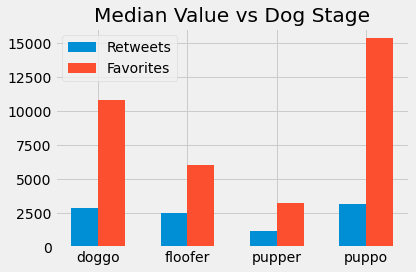

In [65]:
# Bar Graph
x_label_bar = ['doggo', 'floofer', 'pupper', 'puppo']
x_bar = np.arange(len(x_label_bar))
bar_width = 0.3

# Bar graph
fig, ax = plt.subplots()
bar_retweet = ax.bar(x_bar - bar_width/2, label_retweet, bar_width, label='Retweets')
bar_favorite = ax.bar(x_bar + bar_width/2, label_favorite, bar_width, label='Favorites')

# x-axis labels
ax.set_xticks(x_bar)
ax.set_xticklabels(x_label_bar)

# legend
ax.legend();

# title
plt.title('Median Value vs Dog Stage')

plt.tight_layout()
# Save bar chart
plt.savefig('retweet_favorite_vs_dog_stage.png');

In [66]:
# See if ratio between Favorites and Retweets is similar between dog stages

n = df_merge2[ (df_merge2['dog_stage'] == 'doggo') | (df_merge2['dog_stage'] == 'floofer')
          | (df_merge2['dog_stage'] == 'pupper') | (df_merge2['dog_stage'] == 'puppo')   
         ].groupby('dog_stage')['favorite_count'].median()

d = df_merge2[ (df_merge2['dog_stage'] == 'doggo') | (df_merge2['dog_stage'] == 'floofer')
          | (df_merge2['dog_stage'] == 'pupper') | (df_merge2['dog_stage'] == 'puppo')   
         ].groupby('dog_stage')['retweet_count'].median()
ratio = n / d
print('Favorites:Retweets')
print(ratio)

Favorites:Retweets
dog_stage
doggo      3.779021
floofer    2.421682
pupper     2.709196
puppo      4.769876
dtype: float64


### 5.2 Number and Ratio of Dogstages
<a id="number_ratio_dogstages"></a>

In [67]:
# Number of each dog stage
stage_ratio = df_merge2[ (df_merge2['dog_stage'] == 'doggo') | (df_merge2['dog_stage'] == 'floofer')
          | (df_merge2['dog_stage'] == 'pupper') | (df_merge2['dog_stage'] == 'puppo')   
         ]['dog_stage'].value_counts()

In [73]:
# Check "stage_ratio"
print(stage_ratio)
f = 250 + 82 + 31 + 9
print(f)

pupper     250
doggo       82
puppo       31
floofer      9
Name: dog_stage, dtype: int64
372


##### 5.2 Pie Chart: Number of each dogstage

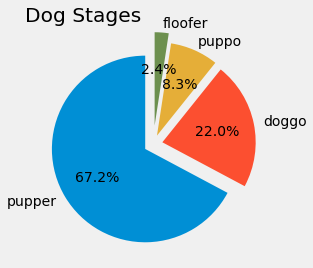

In [69]:
# Pie Chart
labels_pie = 'pupper', 'doggo', 'puppo', 'floofer'
fig1, ax1 = plt.subplots()

# Pie chart
ax1.pie(stage_ratio, labels = labels_pie, autopct='%1.1f%%', startangle = 90, explode = (0.1, 0.1, 0.1, 0.2) );

# Title
plt.title('Dog Stages                      ')

# Save pie chart
plt.savefig('dog_stage_ratio_pie.png')

### 5.3 Dogstage Ratings
<a id="boxplot"></a>

In [70]:
df_merge2.groupby('dog_stage')['rating_ratio'].agg(['count', 'min', 'max', 'mean', 'median'])

,count,min,max,mean,median
dog_stage,,,,,
doggo,82,0.8,1.4,1.178049,1.2
"doggo,floofer",1,1.1,1.1,1.100000,1.1
"doggo,pupper",10,0.5,1.3,1.110000,1.2
"doggo,puppo",2,1.3,1.3,1.300000,1.3
floofer,9,1.0,1.3,1.188889,1.2
pupper,250,0.3,1.4,1.069812,1.1
puppo,31,0.9,1.4,1.203226,1.2


##### 5.3 Boxplot: Rating for each dogstage

In [71]:
# Boxplot (bp) data for dog stages
bp_doggo = df_merge2[ (df_merge2['dog_stage'] == 'doggo') ]['rating_ratio']
bp_floofer = df_merge2[ (df_merge2['dog_stage'] == 'floofer') ]['rating_ratio']
bp_pupper = df_merge2[ (df_merge2['dog_stage'] == 'pupper') ]['rating_ratio']
bp_puppo = df_merge2[ (df_merge2['dog_stage'] == 'puppo') ]['rating_ratio']

# Make the individual data into a list for easier plot making
box_plot_data = [bp_doggo, bp_floofer, bp_pupper, bp_puppo]

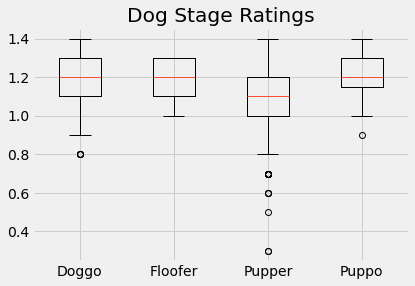

In [72]:
# Box Plot
fig3, ax3 = plt.subplots()

# Box Plot
ax3.boxplot(box_plot_data, labels = ['Doggo', 'Floofer', 'Pupper', 'Puppo']);

# Plot Title
plt.title('Dog Stage Ratings');

# Save box plot
plt.savefig('dog_stage_ratings.png')

# 6. Insights
<a id="insights"></a>

1.  Puppers have the widest range of ratings, including the lowest, and some of the highest ratings.  Floofers have the highest ratings floor, their lowest rating is 10/10.

2.  For favorites and retweets, the data is skewed right, meaning that the means are higher than the medians.  This is true for all four dog stages.

3.  Puppers are the most represented dog stage, and also have the widest range of ratings. and the lowest average rating.